## Import deps

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import signal


# Carbon Intensity vs. Workload (CAISO)

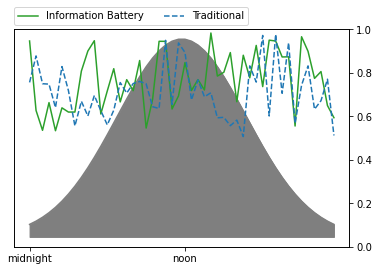

In [21]:
'''
Based on two scale plot example from
https://matplotlib.org/gallery/api/two_scales.html
'''

# Mock data
t = np.arange(0, 48)
c_intensity = signal.gaussian(len(t), std=10) # Carbon intensity
t_workload = np.random.uniform(0.5, 1.0, len(t)) # Traditional workload
ib_workload = np.random.uniform(0.5, 1.0, len(t)) # Workload w/IB system

fig, ax1 = plt.subplots()

# Plot carbon intensity
color = 'tab:gray'
ax1.set_ylabel('carbon intensity')
ax1.plot(t, c_intensity, color=color)
ax1.fill_between(t, 0, c_intensity, color=color)
ax1.tick_params(axis='x')

# Setup x-axis ticks
ax1.xaxis.set_ticks(np.arange(0, len(t), len(t) / 2))
ax1.set_xticklabels(['midnight', 'noon'])

ax1.axes.get_yaxis().set_visible(False)

# Plot Datacenter Workload
ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylim(0, 1.0)
ib_line, = ax2.plot(t, ib_workload, color=color, label='Information Battery')

color = 'tab:blue'
t_line, = ax2.plot(t, t_workload, linestyle='dashed', color=color, label='Traditional')

# Legend
plt.legend(handles=[ib_line, t_line])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, borderaxespad=0.)